In [21]:
import models
import utils
import torch.optim as optim
import torch
import torch.nn as nn

In [22]:
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

In [11]:
device

'mps'

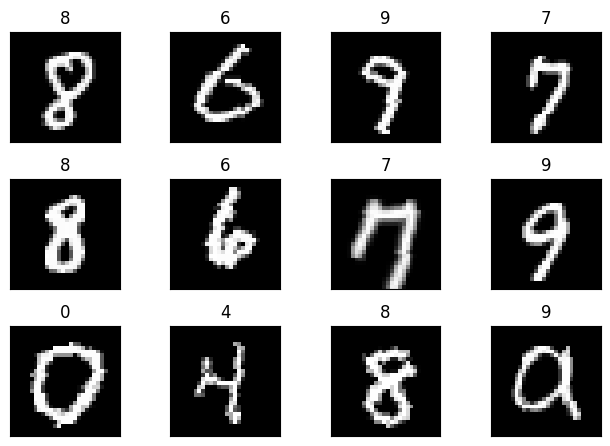

In [23]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(utils.train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [24]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [26]:

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    pred = model(data)

    # Calculate loss
    loss = criterion(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()
    
    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
     

In [27]:
model = models.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, utils.train_loader, optimizer, criterion)
  test(model, device, utils.test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2399 Batch_id=117 Accuracy=48.90: 100%|██████████| 118/118 [00:10<00:00, 11.02it/s]


Test set: Average loss: 0.0005, Accuracy: 9146/10000 (91.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2050 Batch_id=117 Accuracy=93.25: 100%|██████████| 118/118 [00:10<00:00, 11.61it/s]


Test set: Average loss: 0.0002, Accuracy: 9705/10000 (97.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1445 Batch_id=117 Accuracy=96.04: 100%|██████████| 118/118 [00:10<00:00, 11.60it/s]


Test set: Average loss: 0.0002, Accuracy: 9736/10000 (97.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1074 Batch_id=117 Accuracy=96.91: 100%|██████████| 118/118 [00:10<00:00, 11.51it/s]


Test set: Average loss: 0.0001, Accuracy: 9832/10000 (98.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1265 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:10<00:00, 11.71it/s]


Test set: Average loss: 0.0001, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0328 Batch_id=117 Accuracy=97.82: 100%|██████████| 118/118 [00:10<00:00, 11.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0249 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [00:10<00:00, 11.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0293 Batch_id=117 Accuracy=98.18: 100%|██████████| 118/118 [00:10<00:00, 11.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0236 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:10<00:00, 11.69it/s]


Test set: Average loss: 0.0001, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0791 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:10<00:00, 11.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0136 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:10<00:00, 11.71it/s]


Test set: Average loss: 0.0001, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0230 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:10<00:00, 11.59it/s]


Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0632 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:10<00:00, 11.51it/s]


Test set: Average loss: 0.0001, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0116 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:09<00:00, 11.89it/s]


Test set: Average loss: 0.0000, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0545 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:09<00:00, 12.05it/s]


Test set: Average loss: 0.0001, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0022 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:09<00:00, 12.10it/s]


Test set: Average loss: 0.0000, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0203 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:09<00:00, 12.03it/s]


Test set: Average loss: 0.0000, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0046 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [00:10<00:00, 11.68it/s]


Test set: Average loss: 0.0000, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0085 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:09<00:00, 11.99it/s]


Test set: Average loss: 0.0000, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0169 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [00:10<00:00, 11.51it/s]


Test set: Average loss: 0.0000, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

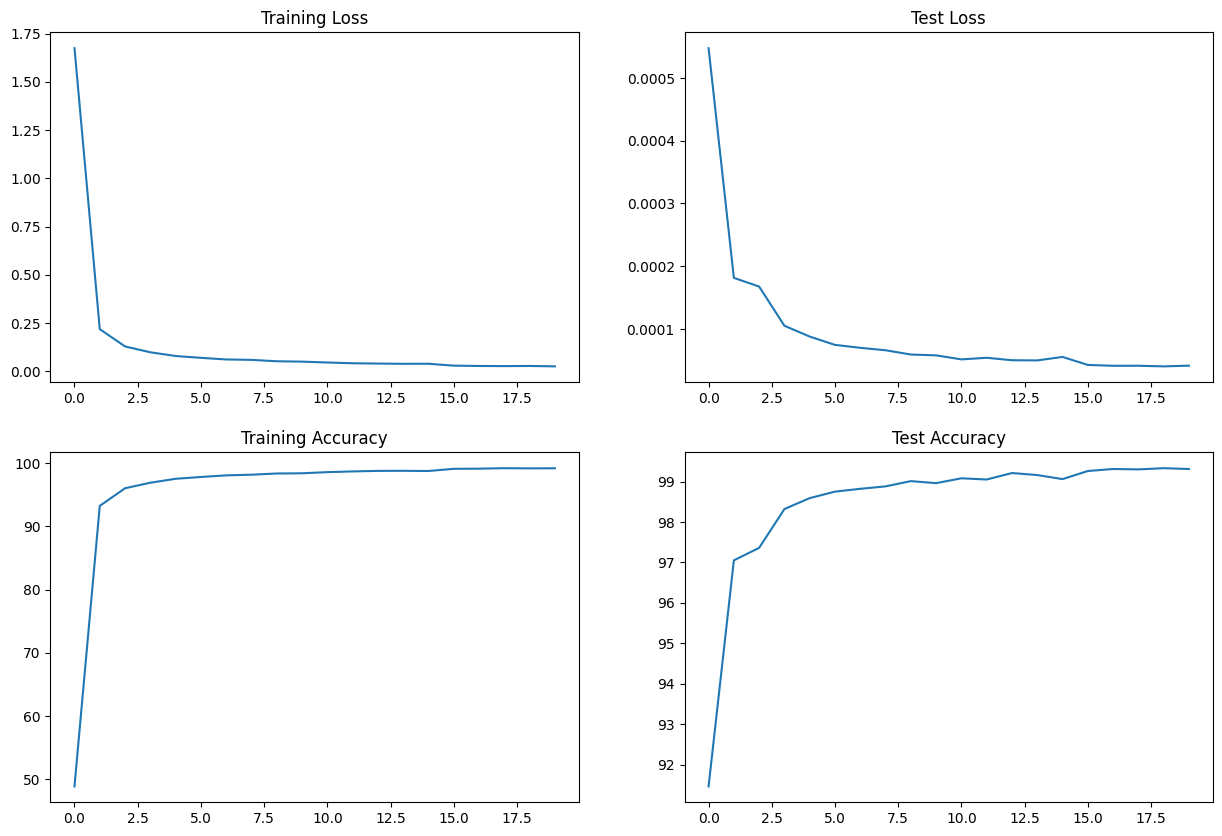

In [28]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [20]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = models.Net().to(device)
summary(model, input_size=(1, 28, 28))


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
